#  **<<< Only Problem 1, 4 and 9 will be graded >>>**

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

## Problem 1
Sketch the following signals
1.
$x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$


2.
$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$

3.
$x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$

4.
$x(t) = u(t) + 5u(t-1) -2u(t-2)$

5.
$x(t) = r(t) - r(t-1) - u(t-2)$




In [51]:
def u(t):
    ''' unitstep function '''
    return t > 0


def r(t):
    ''' ramp function '''
    return t * (t >= 0)

In [52]:
def x_1(t):
    ''' function 1 '''
    return np.sin((np.pi/4)*t + 2*np.pi*(20/360))


def x_2(t):
    ''' function 2 '''
    if t <= -2:
        return t+2
    elif t >= 2:
        return t-2
    else:
        return 0


def x_3(t):
    ''' function 3 '''
    t = min(t, 1)
    t = max(t, 0)
    return 2*np.e**(-t)


def x_4(t):
    ''' function 4 '''
    return u(t) + 5*u(t-1) - 2*u(t-2)


def x_5(t):
    ''' function 5 '''
    return r(t) - r(t-1) - u(t-2)

In [53]:
def display(function,
            minx=-100,
            maxx=100,
            dpo=1,
            subsplot=(1, 1),
            index=1):
    function = np.vectorize(function)
    x = np.linspace(minx, maxx, (maxx-minx)*dpo)
    y = function(np.array(x))
    plt.subplot(subsplot[0], subsplot[1], index)
    plt.title(function.__doc__)

    plt.plot(x,
             np.zeros((maxx-minx)*dpo),
             linestyle='dashed')
    plt.plot(x, y)
    plt.grid()

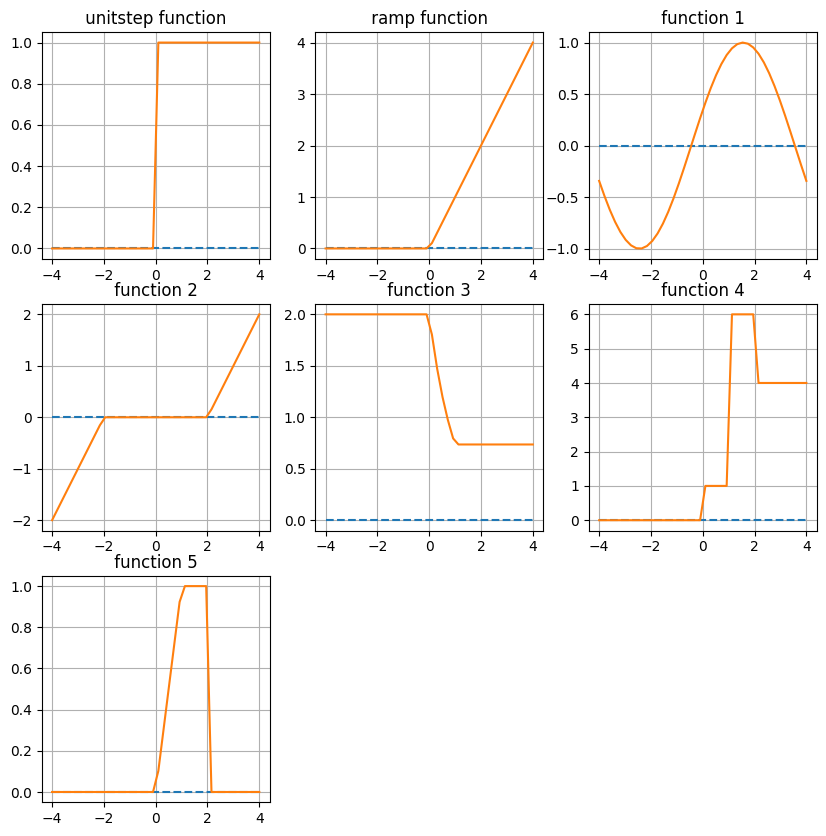

In [54]:
functions = [u, r, x_1, x_2, x_3, x_4, x_5]
num_f = len(functions)
subplot = (int(np.sqrt(num_f))+1, int(np.sqrt(num_f))+1)

plt.figure(figsize=(10, 10))

for i, function in enumerate(functions):
    i += 1
    display(function=function,
            dpo=5,
            minx=-4,
            maxx=4,
            subsplot=subplot,
            index=i)

plt.savefig('Problem 1.png')

## Problem 2
Determine whether each of following signals is periodic, and if so, find its period.
1.
$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$
2.
$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.
$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $


## Problem 3
Determine whether the following signals are power or energy signals or neither. Justify your answers

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$



## Problem 4
For the discrete time signal x[n] shown in Figure below, sketch each of the following

1. $x[2-n] $
2. $x[3n-4] $
3. $x\left[ \frac{2}{3}n+1 \right]  $
4. $x\left[-\frac{n+8}{4} \right] $
5. $x[n^3] $
8. $x[2-n] +x[3n-4] $

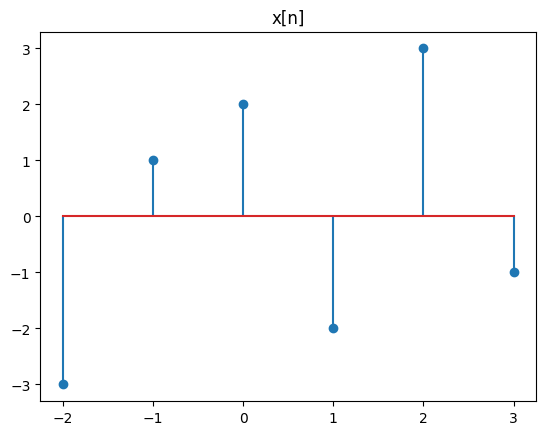

In [55]:
# x[n]
t = np.arange(-2, 4)
x_t = np.array([-3, 1, 2, -2, 3, -1])
plt.stem(t, x_t)
plt.title('x[n]')
plt.show()

In [56]:
def filter_t(x, y):
    ret_x, ret_y = [], []
    for i in range(len(x)):
        if x[i].is_integer():
            ret_x += [x[i]]
            ret_y += [y[i]]

    return ret_x, ret_y


def reflex(x, y):
    x = np.array(x, dtype=np.float32)
    y = np.copy(y)

    for i in range(len(x)):
        x[i] *= -1

    return filter_t(x, y)


def shift(x, y, t):
    x = np.array(x, dtype=np.float32)
    y = np.copy(y)

    for i in range(len(x)):
        x[i] -= t

    return filter_t(x, y)


def scale(x, y, s):
    x = np.array(x, dtype=np.float32)
    y = np.copy(y)

    for i in range(len(x)):
        x[i] /= float(s)

    return filter_t(x, y)


def combine(x1, y1, x2, y2):
    d1 = dict(zip(x1, y1))
    d2 = dict(zip(x2, y2))

    start = int(min(x1+x2))
    stop = int(max(x1+x2)+1)

    ret_x = []
    ret_y = []

    for i in range(start, stop):
        f1 = d1[i] if i in d1 else 0
        f2 = d2[i] if i in d2 else 0

        ret_x += [float(i)]
        ret_y += [f1+f2]

    return filter_t(ret_x, ret_y)

In [57]:
def dx_1(x, y):
    ''' 
        x[2-n]
        x[-n + 2]
    '''
    x, y = np.copy(x), np.copy(y)
    x, y = reflex(x, y)
    x, y = shift(x, y, 2)

    return x, y


def dx_2(x, y):
    ''' 
        x[3n-4] 
        x[3(n-4/3)]
    '''
    x, y = np.copy(x), np.copy(y)
    x, y = scale(x, y, 3)
    x, y = shift(x, y, -4/3)

    return x, y


def dx_3(x, y):
    ''' 
        x[(2/3)n+1]
        x[(2/3)(n + (3/2))]
    '''
    x, y = np.copy(x), np.copy(y)
    x, y = scale(x, y, 2/3)
    x, y = shift(x, y, 3/2)
    return x, y


def dx_4(x, y):
    ''' 
        x[(-(n+8)/4)]
        x[(-1/4)(n+8)]
    '''
    x, y = np.copy(x), np.copy(y)
    x, y = reflex(x, y)
    x, y = scale(x, y, 1/4)
    x, y = shift(x, y, 8)
    return x, y


def dx_5(x, y):
    ''' 
        x[n^3] 
    '''
    x, y = np.copy(x), np.copy(y)
    def cube_root(x): return x**(1/3)
    x = cube_root(x)
    x, y = filter_t(x, y)
    return x, y


def dx_6(x, y):
    ''' 
        x[2-n] +x[3n-4] 
        x[-n + 2] + x[3(n-(4/3))]
    '''
    x1, y1 = np.copy(x), np.copy(y)
    x1, y1 = reflex(x1, y1)
    x1, y1 = shift(x1, y1, 2)

    x2, y2 = np.copy(x), np.copy(y)
    x2, y2 = scale(x2, y2, 3)
    x2, y2 = shift(x2, y2, -4/3)

    x, y = combine(x1, y1, x2, y2)

    return x, y

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_41549/3479023652.py:53: RuntimeWarning: invalid value encountered in power
  cube_root = lambda x : x**(1/3)


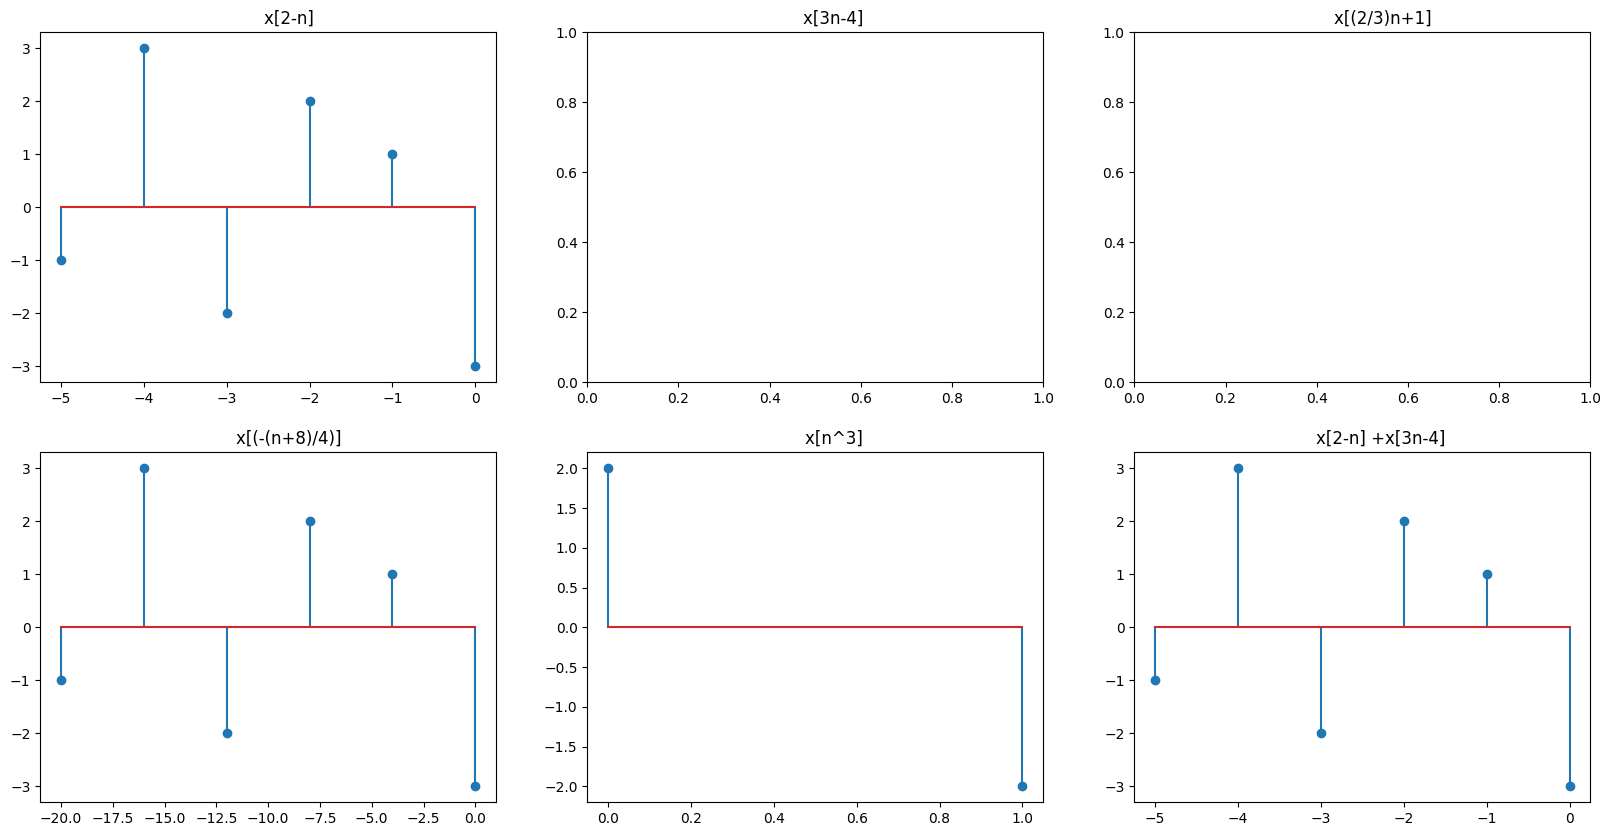

In [58]:
functions = [dx_1, dx_2, dx_3, dx_4, dx_5, dx_6]
plt.figure(figsize=(20, 10))

for i, function in enumerate(functions):
    x, y = function(t, x_t)
    plt.subplot(2, 3, i+1)
    plt.title(function.__doc__.split('\n')[1])
    if len(x) != 0:
        plt.stem(x, y)
plt.savefig('Problem 4.png')

## Problem 5
Determine whether each of following signals is periodic, and if so, find its period.

1.
$x[n] = \sin \left( \frac{\pi n}{4} + \frac{\pi}{8}\right)$

1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \sin\left( \frac{\pi}{3}n\right)$

1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right)\sin\left( \frac{\pi}{3}n\right)$

1.
$x[n] = \exp \left( \frac{6\pi}{5}n \right)$

1.
$x[n] = \exp \left( j\frac{5\pi}{6}n \right)$

1.
$x[n] =  \sum_{m=-\infty}^{\infty} \left[ \delta[n-2m] + 2\delta[n-3m] \right]$

<!-- 1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \cos \left( \frac{\pi}{3} n \right)$ -->

 ## Problem 6

 [python] Signal transformations :
 Study the sawtooth function in the figure below. Apply reflection, scaling, shifting operations to the signal and plot the transformed signals compared with the original sawtooth signal.  


In [59]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 

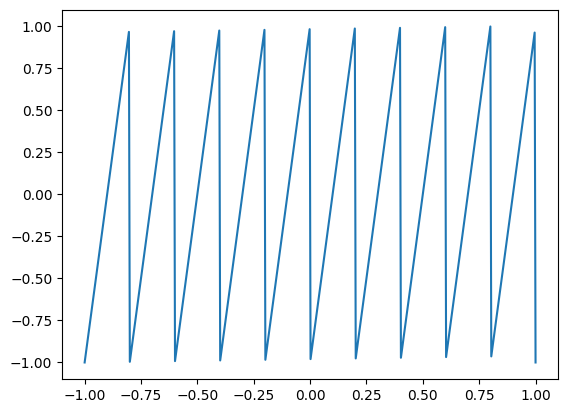

In [60]:
t = np.linspace(-1, 1, 500)
plt.plot(t,
         signal.sawtooth(2 * np.pi * 5 * t))
plt.show()

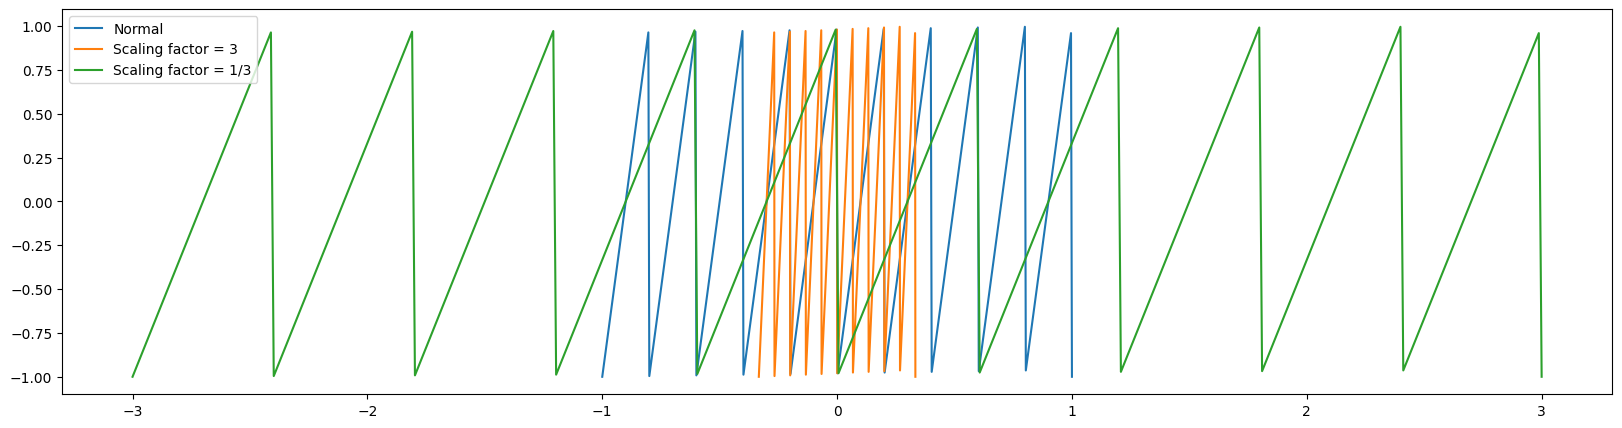

In [80]:
plt.figure(figsize=(20, 5))

t = np.linspace(-1, 1, 500)
x_t = signal.sawtooth(2 * np.pi * 5 * t)

plt.plot(t,
         x_t,
         label='Normal')

# scaling factor = 3 and 1/3
# TODO : writing code for time scaling

# sf = 3
t_s3 = t / 3

plt.plot(t_s3,
         x_t,
         label='Scaling factor = 3')

# sf = 1/3
t_s1_3 = t / (1/3)

plt.plot(t_s1_3,
         x_t,
         label='Scaling factor = 1/3')

plt.legend()

plt.savefig('Problem 6 Scaling.png')

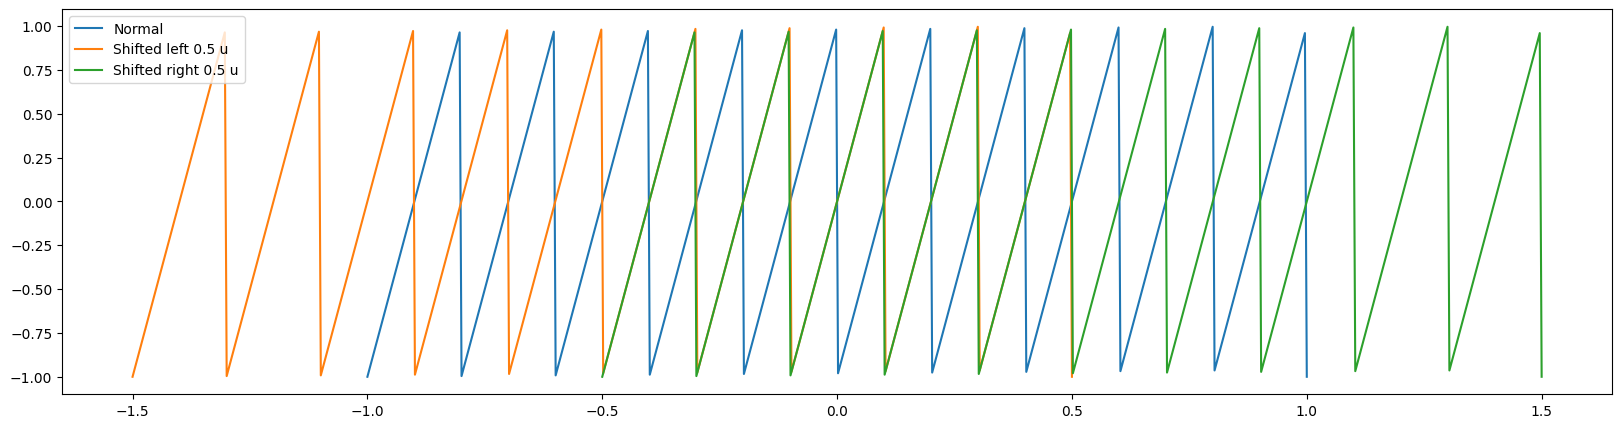

In [69]:
plt.figure(figsize=(20, 5))
t = np.linspace(-1, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t), label='Normal')

# shifting t to the left and right 0.05 units

# TODO : writing code for time shifting

# shift left = 0.5
t_sl05 = t - 0.5
plt.plot(t_sl05, x_t, label='Shifted left 0.5 u')

# shift right = 0.5
t_sr05 = t + 0.5
plt.plot(t_sr05, x_t, label='Shifted right 0.5 u')

plt.legend()

plt.savefig('Problem 6 Shifting.png')

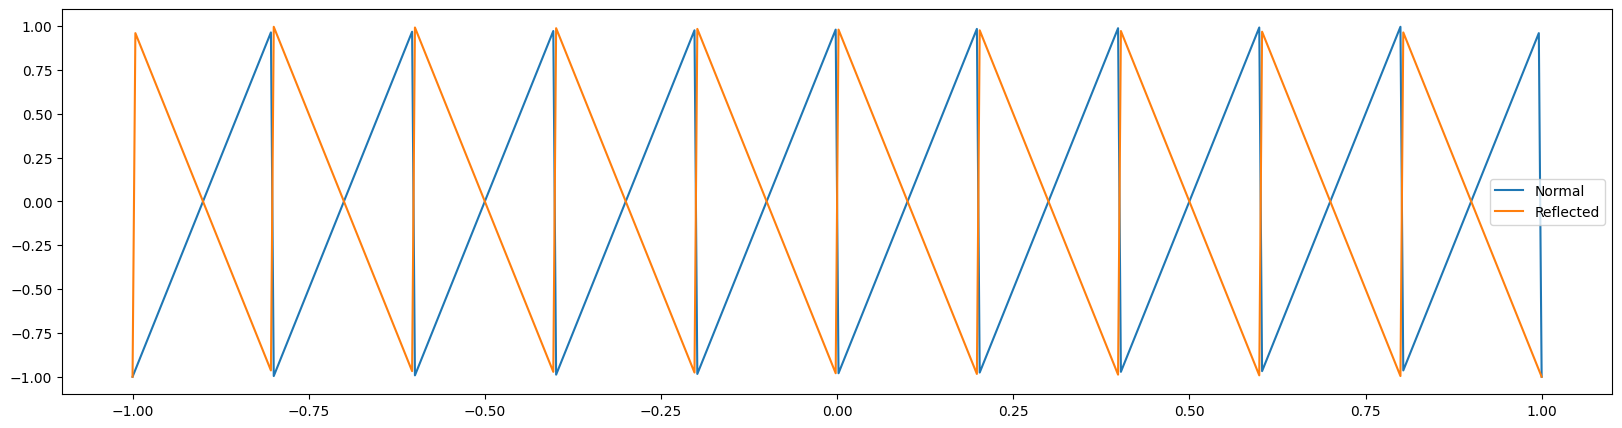

In [70]:
plt.figure(figsize=(20, 5))
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t), label='Normal')

# TODO : writing code for time Reflection

t_rf = -1*t

plt.plot(t_rf, x_t, label='Reflected')

plt.legend()

plt.savefig('Problem 6 Reflecting.png')

  ## Problem 7
 [python] Elementary signals: study  the ramp signal plotted in the example below. \\
TODO : plot these signals

1.   Unit step function
2.   Unit impulse function



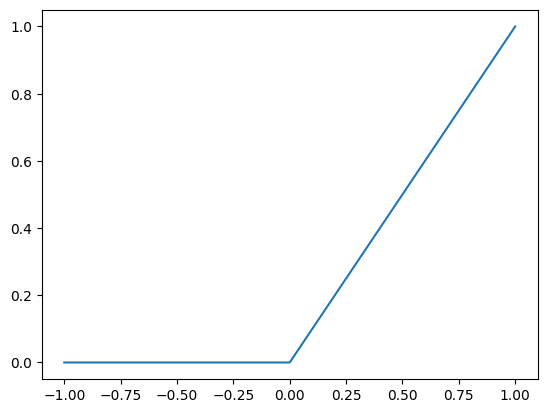

In [64]:
t = np.linspace(-1, 1, 500)
ramp_t = t.copy()
ramp_t[ramp_t < 0] = 0
plt.plot(t, ramp_t)
plt.show()

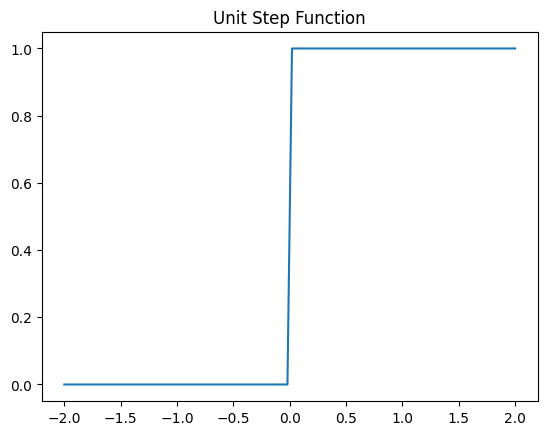

In [83]:
# TODO : writing code for plotting unit step function
def u(t):
    return t > 0


t = np.linspace(-2, 2, 100)
x_t = u(t)

plt.title('Unit Step Function')
plt.plot(t, x_t)
plt.savefig('Problem 7 Unit Step Function.png')

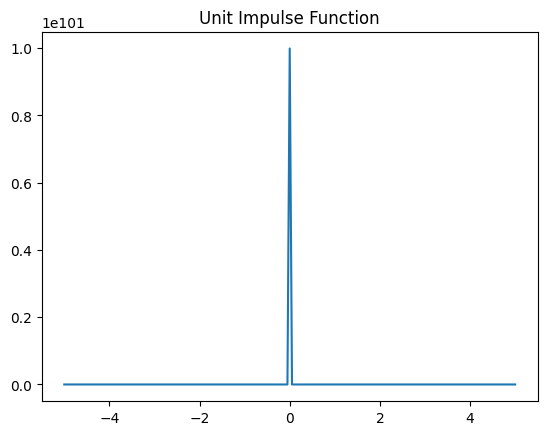

In [82]:
# TODO : writing code for plotting unit impulse function

def delta(t):
    return 9.99e100 * (t == 0)


t = np.linspace(-5, 5, 100)
t = np.concatenate((t[t < 0], [0], t[t > 0]))
x_t = delta(t)

plt.title('Unit Impulse Function')
plt.plot(t, x_t)
plt.savefig('Problem 7 Unit Impulse Function.png')

## Problem 8
Express the signal that shown in Figure below using Unit-ramp functions



<a href="https://ibb.co/pXt8t2Y"><img src="https://i.ibb.co/DKxyx40/Screen-Shot-2564-08-11-at-15-16-52.png" alt="Screen-Shot-2564-08-11-at-15-16-52" border="0"></a>



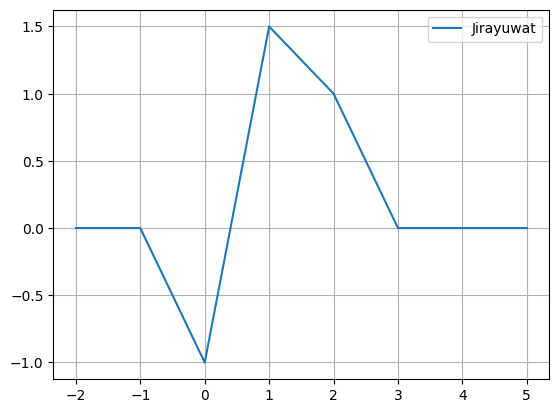

In [85]:
ret_x = np.array([])
ret_y = np.array([])

ret_x = np.concatenate((
    np.linspace(-2, -1),
    np.linspace(-1, 0),
    np.linspace(0, 1),
    np.linspace(1, 2),
    np.linspace(2, 3),
    np.linspace(3, 5),
))

# divide it into 6 parts

ret_y = np.concatenate((
    # part 1 [-2,-1]
    u(np.linspace(-2, -1)),
    # part 2 [-1,0]
    -1*r(np.linspace(-1, 0)+1),
    # part 3 [0,1]
    2.5*r(np.linspace(0, 1)) - 1,
    # part 4 [1,2]
    -0.5*r(np.linspace(1, 2)-1) + 1.5,
    # part 5 [2,3]
    -1*r(np.linspace(2, 3)-2) + 1,
    # part 6 [3,5]
    u(np.linspace(3, 5))-1
))

plt.plot(ret_x,
         ret_y,
         label = 'Jirayuwat')

plt.legend()

plt.grid()

plt.savefig('Problem 8.png')


## Problem 9

Evaluate the following integrals

1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt$

1. $\int_{-\infty}^{\infty} (t-1) \delta \left(\frac{2}{3}t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$